In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # kde plots

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor # mean
from sklearn.linear_model import LinearRegression # linear
from sklearn.ensemble import RandomForestRegressor # ensemble 
from sklearn.metrics import mean_squared_log_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")
sample_df = pd.read_csv("/kaggle/input/playground-series-s5e5/sample_submission.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e5/test.csv")

# Preprocessing Data
Describing the data to check for missing values, duplicates, distribution and correlation followed by encoding any necessary features and normalizing the target values 

In [3]:
# check column name and data type
print("\nColumn Data Type:")
print(train_df.dtypes)


Column Data Type:
id              int64
Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object


In [4]:
print(train_df.describe(include='all').round(3)) # describe numeric and object data

                id     Sex         Age      Height      Weight    Duration  \
count   750000.000  750000  750000.000  750000.000  750000.000  750000.000   
unique         NaN       2         NaN         NaN         NaN         NaN   
top            NaN  female         NaN         NaN         NaN         NaN   
freq           NaN  375721         NaN         NaN         NaN         NaN   
mean    374999.500     NaN      41.420     174.698      75.146      15.421   
std     216506.495     NaN      15.175      12.824      13.983       8.354   
min          0.000     NaN      20.000     126.000      36.000       1.000   
25%     187499.750     NaN      28.000     164.000      63.000       8.000   
50%     374999.500     NaN      40.000     174.000      74.000      15.000   
75%     562499.250     NaN      52.000     185.000      87.000      23.000   
max     749999.000     NaN      79.000     222.000     132.000      30.000   

        Heart_Rate   Body_Temp    Calories  
count   750000.000

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
print(train_df.isna().sum()) # check missing data

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [6]:
# Count unique values in id -> no duplicates
num_unique = train_df['id'].nunique()
print(num_unique)

750000


## Frequency, Distribution of Data

In [7]:
train_df = train_df.drop('id', axis=1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


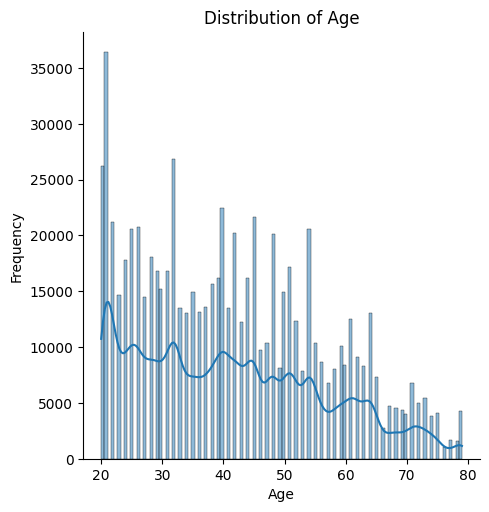

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


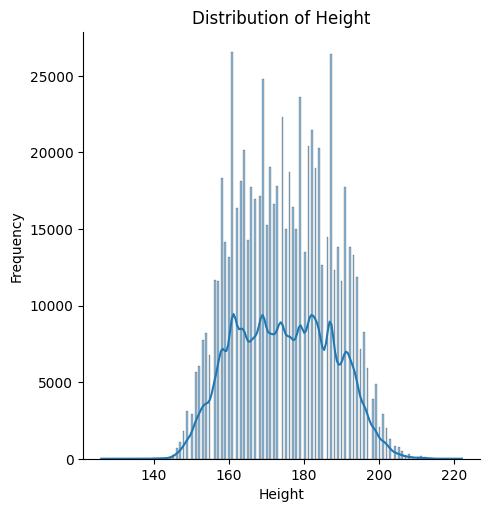

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


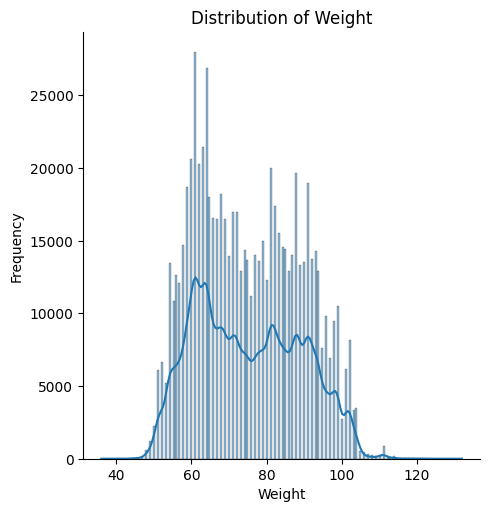

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


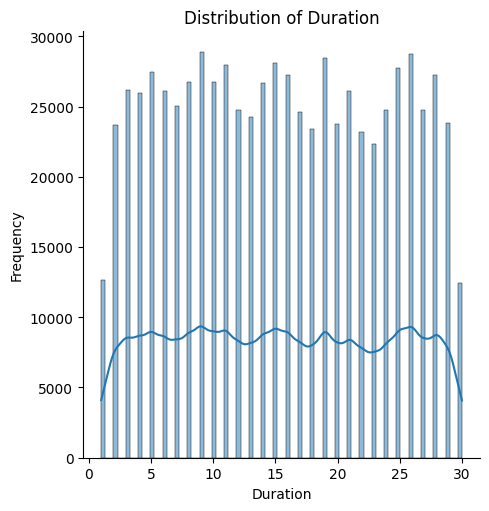

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


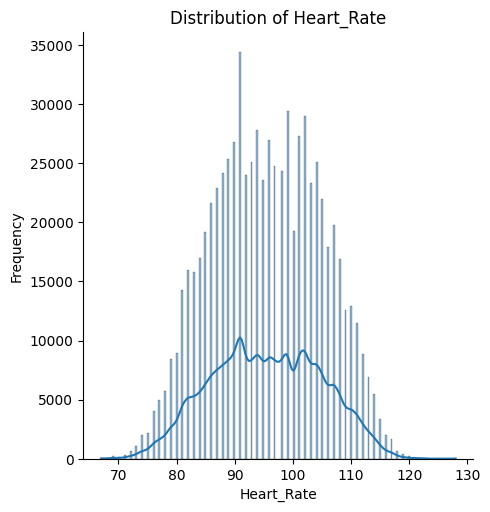

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


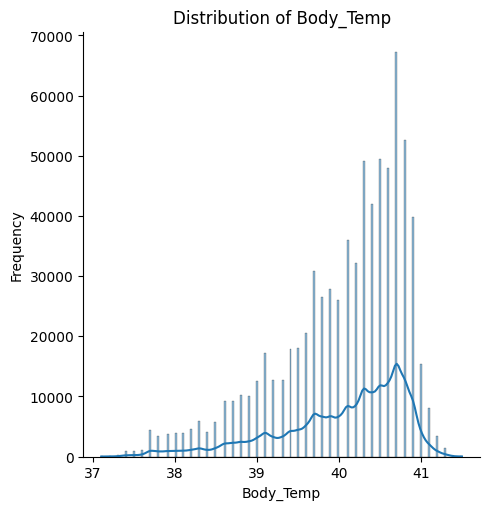

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


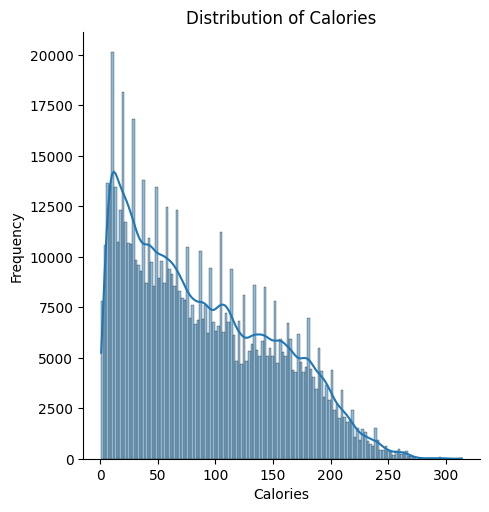

In [8]:
# distribution of the features and target

numeric_cols = train_df.select_dtypes(include=['number']).columns

for column in numeric_cols:
    sns.displot(train_df, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## one-hot encoded gender
Converting the gender values from categorical to numerical format for the models to understand; 0=Male, 1=Female

In [9]:
sexEncoded = pd.get_dummies(train_df['Sex'], dtype = float)
sexEncoded.rename(columns={'female':'Sex_Female'}, inplace=True)

In [10]:
trainEncoded_df = pd.concat([train_df, sexEncoded], axis=1) # add numeric gender to df

In [11]:
trainEncoded_df.drop(['Sex', 'male'], axis=1, inplace=True) # drop to have 1 col for Sex

In [12]:
trainEncoded_df.rename(columns={'Sex_Female':'Sex'},inplace=True)

In [13]:
print('\nPearson Correlation:')
trainEncoded_df.corr('pearson')


Pearson Correlation:


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex
Age,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683,-0.009689
Height,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026,-0.755906
Weight,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863,-0.818250
Duration,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908,0.009594
Heart_Rate,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748,-0.009122
Body_Temp,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671,0.015933
Calories,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000,-0.012011
Sex,-0.009689,-0.755906,-0.818250,0.009594,-0.009122,0.015933,-0.012011,1.000000


In [14]:
print(trainEncoded_df['Sex'].value_counts())

Sex
1.0    375721
0.0    374279
Name: count, dtype: int64


## log-transform the target

In [15]:
# log transform the target to reduce skewness
trainEncoded_df['Calories_log'] = np.log1p(trainEncoded_df['Calories'])

In [16]:
print(trainEncoded_df.head(5))

   Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  Sex  \
0   36   189.0    82.0      26.0       101.0       41.0     150.0  0.0   
1   64   163.0    60.0       8.0        85.0       39.7      34.0  1.0   
2   51   161.0    64.0       7.0        84.0       39.8      29.0  1.0   
3   20   192.0    90.0      25.0       105.0       40.7     140.0  0.0   
4   38   166.0    61.0      25.0       102.0       40.6     146.0  1.0   

   Calories_log  
0      5.017280  
1      3.555348  
2      3.401197  
3      4.948760  
4      4.990433  


In [17]:
# drop calories col since we now have its log
trainEncoded_df = trainEncoded_df.drop(columns='Calories', axis=1)

# Training Dataset
Using dummy regressor, linear regression, and random forest models. RMSLE as the metric to evaluate their performance 

In [18]:
# define features as x and target as y
X=trainEncoded_df.drop(columns=['Calories_log'])
y=trainEncoded_df['Calories_log']

In [19]:
# splitting training and val set 80/20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Dummy Regressor Model (Baseline)

dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)

# predict on val
dummy_vals = dummy_model.predict(X_val)

# RMSLE performance
dummy_rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_val), np.expm1(dummy_vals)))
print("Dummy Regressor RMSLE:",dummy_rmsle)

Dummy Regressor RMSLE: 0.9625460085176747


In [21]:
# Linear Regression Model

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

# predict on val
LR_vals = LR_model.predict(X_val)

# RMSLE performance
LR_rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_val), np.expm1(LR_vals)))
print("Linear Regression RMSLE:",LR_rmsle)

Linear Regression RMSLE: 0.17927320200468452


In [22]:
# Random Forest Model

RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)

# predict on val
RF_vals = RF_model.predict(X_val)

# RMSLE performance
RF_rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_val), np.expm1(RF_vals)))
print("Random Forest RMSLE:",RF_rmsle)

Random Forest RMSLE: 0.06324847778128567


# Predictions on Test Dataset

## preprocess test dataset
Check for missing values and duplicates, drop id column, encode sex data (0=male, 1=female), then assign features as X_test to later predict Calories (target) 

In [23]:
# check missing and duplicates
print(test_df.shape)
print('\nNull:\n',test_df.isnull().sum())
duplicates_count = test_df.duplicated().sum()
print('\nDuplicates:',duplicates_count)

(250000, 8)

Null:
 id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

Duplicates: 0


In [24]:
# remove id column 
test_df = test_df.drop('id', axis=1)

In [25]:
# encode sex, 0=male, 1=female
sexEncoded = pd.get_dummies(test_df['Sex'], dtype = float)
sexEncoded.rename(columns={'female':'Sex_Female'}, inplace=True)

In [26]:
# concat to test df
testEncoded_df = pd.concat([test_df, sexEncoded], axis=1)

In [27]:
# drop male, female col
testEncoded_df.drop(['Sex', 'male'], axis=1, inplace=True)
# rename sex_female
testEncoded_df.rename(columns={'Sex_Female':'Sex'},inplace=True)
print(testEncoded_df.head(10))

   Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Sex
0   45   177.0    81.0       7.0        87.0       39.8  0.0
1   26   200.0    97.0      20.0       101.0       40.5  0.0
2   29   188.0    85.0      16.0       102.0       40.4  1.0
3   39   172.0    73.0      20.0       107.0       40.6  1.0
4   30   173.0    67.0      16.0        94.0       40.5  1.0
5   43   169.0    65.0       6.0        81.0       39.4  1.0
6   74   189.0    97.0       9.0        86.0       40.0  0.0
7   60   186.0    90.0       2.0        79.0       38.1  0.0
8   21   196.0    91.0       4.0        84.0       38.7  0.0
9   32   189.0    89.0      29.0       111.0       40.8  0.0


## Predict Calories using Random Forest 

In [28]:
# X val for predictions
X_test = testEncoded_df

In [29]:
# make predictions using random forest regressor model

test_preds = RF_model.predict(X_test)
test_preds = np.expm1(test_preds) # reverse log

## final submission file

In [30]:
sample_df['Calories'] = test_preds.round(1)
sample_df.to_csv("my_submission.csv", index=False)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


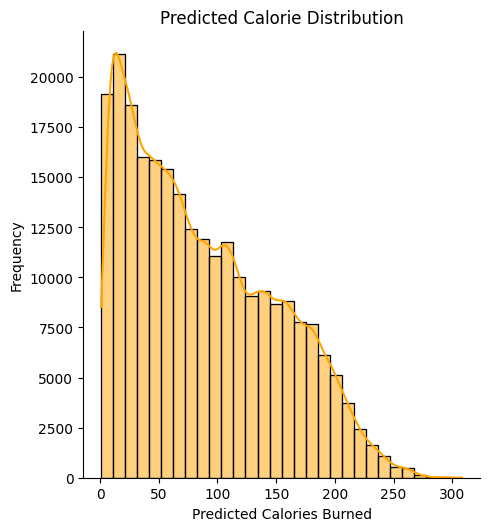

In [31]:
# visualize test predicts

sns.displot(pd.Series(test_preds), bins=30, color='orange', kde=True)

plt.xlabel('Predicted Calories Burned')
plt.ylabel('Frequency')
plt.title('Predicted Calorie Distribution')
plt.show()